# Least squares

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from numpy.linalg import lstsq, solve
from scipy.optimize import minimize
from numpy.random import seed, randn

## The basics
Often, we might suspect that a particular type of function can be used to model given data. The data below, for example, should lie close to a line since it's generated by an affine function plus a little noise:

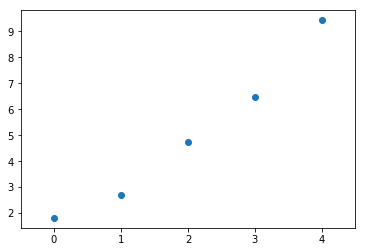

In [2]:
seed(1)
xs = np.array(list(range(5)))
ys = [2*x+1 + randn()/2 for x in xs]
plt.plot(xs,ys,'o')
ax = plt.gca()
ax.set_xlim(-0.5,4.5);

We might try to model this with an affine function. We'd write:
$$y_i \sim a x_i + b.$$
Since, the model is not likely to be perfect, we expect that we won't be able to fit the data exactly; thus, we minimize the residuals in the least square sense. That is, we might try to minimize
$$\sum_{i=1}^n (a x_i + b - y_i)^2.$$
This is a simple calculus problem that we might try with SciPy:

In [3]:
def f(ab):
    a = ab[0]
    b = ab[1]
    return sum([((a*xs[i]+b)-ys[i])**2 for i in range(len(xs))])
result = minimize(f,[2,1])
if result['success'] == True:
    print(result['x'])

[ 1.9010456   1.22559441]


I guess this means that $f(x) \approx 1.901x+1.2256$ should closely fit the data. Let's have a look.

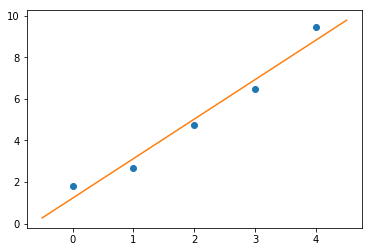

In [4]:
a = result['x'][0]
b = result['x'][1]
def f(x): return a*x+b
plt.plot(xs,ys,'o')
xxs = np.linspace(min(xs)-0.5,max(xs)+0.5,20)
yys = f(xxs)
plt.plot(xxs,yys)

## Linear least squares
More generally, we might try to model given data with a linear combination of basis functions. In the above example, the basis functions are $1$ and $x$. If the basis functions are $1,x,x^2,\ldots,x^n$, we'd generate an $n^{\text{th}}$ degree polynomial that models the data (and, hopefully, well).

### The previous example revisited
Naturally, SciPy has built in functions for this purpose. It's a bit tricky to understand the input, unless you've got a grip on the normal equations. This involves the matrix $A$ whose columns are the constant powers of the $x$-data. There are $n$ columns, if we're using $n$ functions. There are $m$ rows, if we're fitting $m$ points. For this example, we have
$$A = \left(\begin{array}{cc}
 0 & 1 \\
 1 & 1 \\
 2 & 1 \\
 3 & 1 \\
 4 & 1 \\
\end{array}\right).$$
We can construct this matrix pretty easily using `numpy`'s `vstack` command, together with a `transpose`.

In [5]:
A = np.vstack([xs, xs**0]).transpose()
A

array([[0, 1],
       [1, 1],
       [2, 1],
       [3, 1],
       [4, 1]])

Once we have this, it's just a matter of applying the `lstsq` function to get the coefficients.

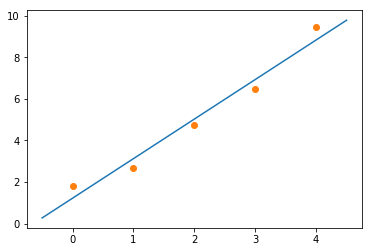

In [6]:
m,b = lstsq(A, ys)[0]
def ff(x): return m*x+b
yys = ff(xxs)
plt.plot(xxs,yys)
plt.plot(xs,ys,'o')

### A higher degree example
Let's use the normal equations to fit a cubic to more complicated data.

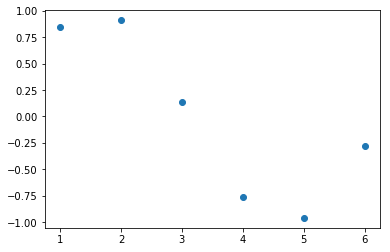

In [7]:
xs = np.arange(1,7)
ys = np.sin(xs)
plt.plot(xs,ys,'o')

It seems like a cubic might fit that well.

poly1d([ 0.10245194, -0.98069833,  2.23648236, -0.50119015])

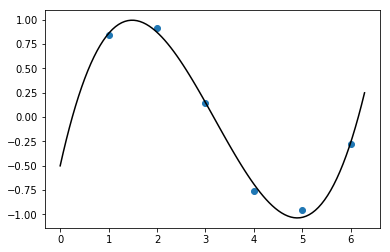

In [8]:
A = np.vstack([xs**3, xs**2, xs**1, xs**0]).transpose()
coeffs = np.linalg.lstsq(A, ys)[0]
p = np.poly1d(coeffs)
xxs = np.linspace(0,2*np.pi,100)
yys = p(xxs)
plt.plot(xs,ys,'o')
plt.plot(xxs,yys, 'k')
p

## A by hand example
You might consider how to fit the following data with a line.

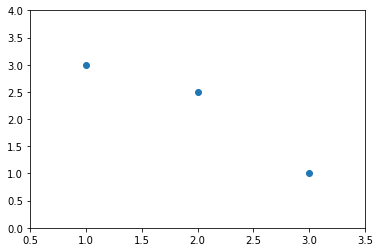

In [9]:
data = [(1,3), (2,2.5), (3,1)]
xs = [d[0] for d in data]
ys = [d[1] for d in data]
plt.plot(xs,ys, 'o')
ax = plt.gca()
ax.set_xlim(0.5,3.5)
ax.set_ylim(0,4);

I guess we need $f(x)=ax+b$ where $a$ and $b$ minimize the following function $F$.

\begin{align}
F(a,b) &= (a\times1+b-3)^2 + (a\times2+b-2.5)^2 + (a\times3+b-1)^2 \\
\frac{\partial F}{\partial a} &= 2(a+b-3) + 4(2a+b-2.5) + 6(3a+b-1) = 28a + 12b - 22 = 0 \\
\frac{\partial F}{\partial b} &= 2(a+b-3) + 2(2a+b-2.5) + 2(3a+b-1) = 12a + 6b - 13 = 0
\end{align}
Turns out that $a=-1$ and $b=25/6$.